# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.


### I.I. Явный метод Эйлера.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

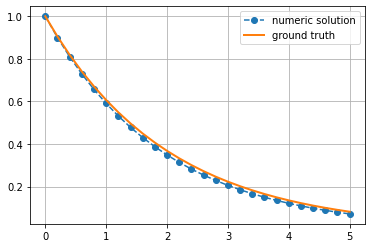

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Теперь попробуем задать значение шага $\tau$ (в коде это `dt`) такое, что $|\lambda| \tau > 1$.

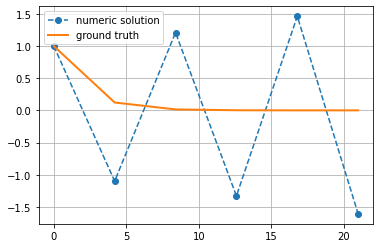

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### I.II Неявный метод Эйлера.

Напишите функцию решения того же самого уравнения $du/dt = \lambda u$ используя неявную схему Эйлера. Постройте решение для нескольких значений шага интегрирования, обсудите поведение решения при $\lambda\tau > 2$.

In [ ]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt * lam)
    return tt, y

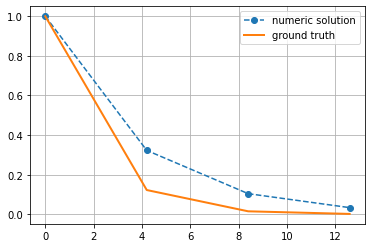

In [ ]:
# Plot your solution. Vary the step size, discuss the behavior of the solution for $\lambda\tau > 2$. 

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

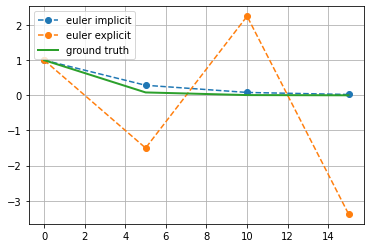

In [ ]:
lam = -0.5

tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.5/abs(lam))
plt.plot(tt, y, 'o--', label='euler implicit')

tt, y = euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.5/abs(lam))
plt.plot(tt, y, 'o--', label='euler explicit')

plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

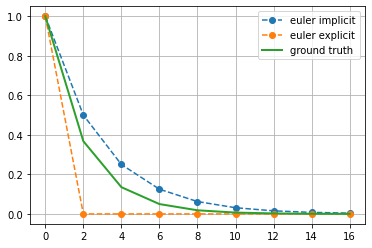

In [ ]:
lam = -0.5

tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=1/abs(lam))
plt.plot(tt, y, 'o--', label='euler implicit')

tt, y = euler_solve(lam, u0=1.0, T=8/abs(lam), dt=1/abs(lam))
plt.plot(tt, y, 'o--', label='euler explicit')

plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

In [ ]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()


## II. Системы линейных уравнений

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = \mathrm{const}$ - заданная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [ ]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps+1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt * a @ y[k]
    return tt, y

Напишите функцию, возвращающую решение задачи Коши для системы уравнений $du/dt = A u$ с постоянной матрицей $A$ через матричную экспоненту. (Используйте библиотечную функцию `scipy.linalg.expm`)

In [ ]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
    
    u0 : ndarray, shape (ndim,)
    
    tt : ndarray, shape (n,)
        The values of $t$
        
    Return
    ------
    u : ndarray, shape (n, ndim)
        u[:, k] is $\exp(t[k] A)$
    """
    n = tt.shape[0]
    ndim = a.shape[0]
    u = np.empty((n, ndim))
    for k in range(n):
        u[k] = expm(a * tt[k]) @ u0
    return u

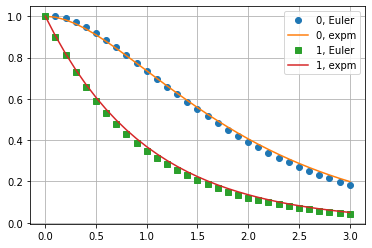

In [ ]:
# Solve via Euler's method, compare to the matrix exponential

from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

In [ ]:
# This cell is a test to compare your Euler method solution to the matrix exponential

a = np.array([[-1, 1],
              [0, -1]], dtype=float)


## II.2 Жесткие системы

Рассмотрим линейную систему, $du/dt = Au$, с матрицей правой части 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $u = (1, 0)^T$.

Найдите собственные значения матрицы $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(2 балла)

In [ ]:
a = np.asarray([[-10, 10],
                [32, -499]])

eig_vals = np.linalg.eigvals(a)
print(eig_vals)
eig_vals = abs(eig_vals)
print(max(eig_vals) / min(eig_vals))

[  -9.34647667 -499.65352333]
53.45902427704808


Система жёсткая

Постройте графики решения системы на интервале $0 < t < 1$ с начальным условием $u = (1, 0)^T$ используя функции `euler_solve2` и `mat_exp_solve`. Используйте несколько значений шага, например $\tau = 4\cdot 10^{-3}$ и $\tau = 4.5\cdot 10^{-3}$. Прокомментируйте поведение решений.

(3 балла)
 

dt = 0.004

dim = 1


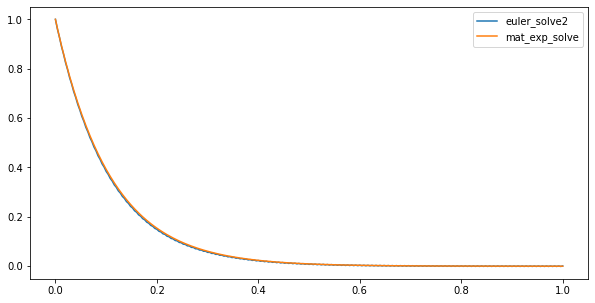


dim = 2


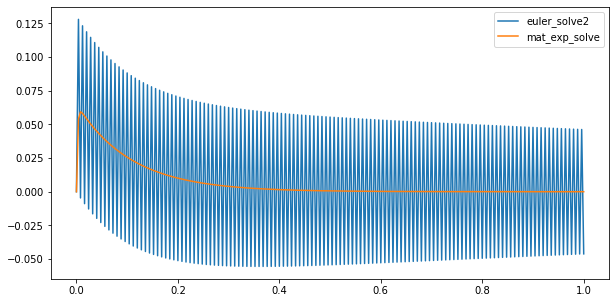

dt = 0.0045

dim = 1


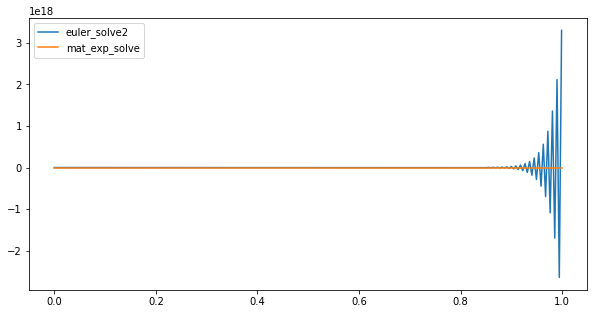


dim = 2


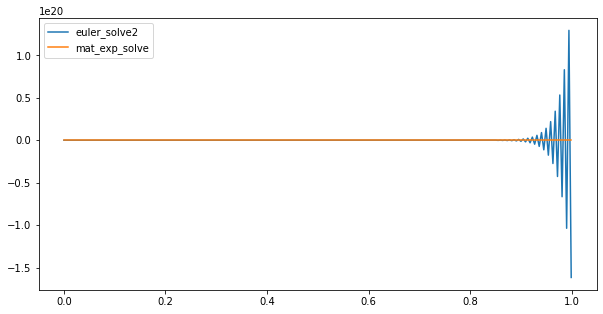

In [ ]:
u0 = np.asarray([1, 0])

for dt in [4e-3, 4.5e-3]:
  t, y = euler_solve2(a, u0=u0, T=1, dt=dt)
  ym = mat_exp_solve(a, u0, t)

  print('dt =', dt)
  for dim in [0, 1]:
    print('\ndim =', dim+1)
    plt.figure(figsize=(10, 5))
    plt.plot(t, y[:, dim], label='euler_solve2')
    plt.plot(t, ym[:,dim], label='mat_exp_solve')
    
    plt.legend()
    plt.show()

## Неявный метод Эйлера II.3

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Примените Вашу реализацию для уравнения из пункта II.2. Прокомментируйте результаты.
(5 баллов)

In [ ]:
def mod_implict_euler_scheme(a, u0, T, dt):
  num_steps = int(T/dt)
  tt = np.arange(num_steps+1) * dt
  ndim = u0.shape[0]
  y = np.empty((num_steps+1, ndim))
  y[0] = u0
  for k in range(num_steps):
      y[k+1] = np.linalg.solve((np.eye(ndim) - dt * a), y[k])
  return tt, y

dt = 0.004

dim = 1


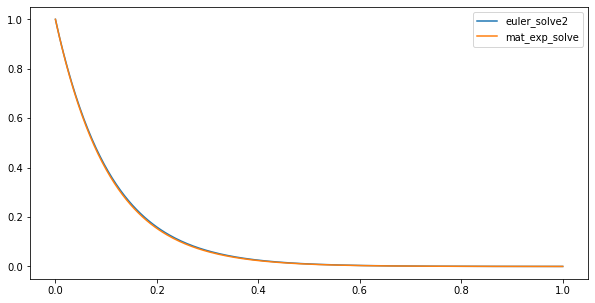


dim = 2


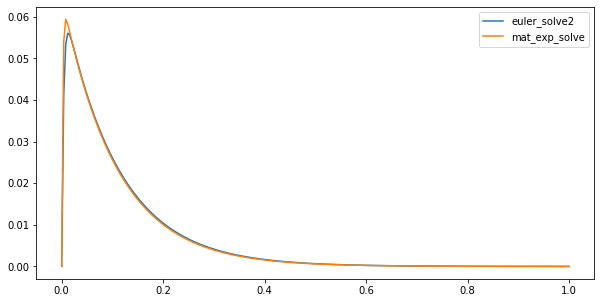

dt = 0.0045

dim = 1


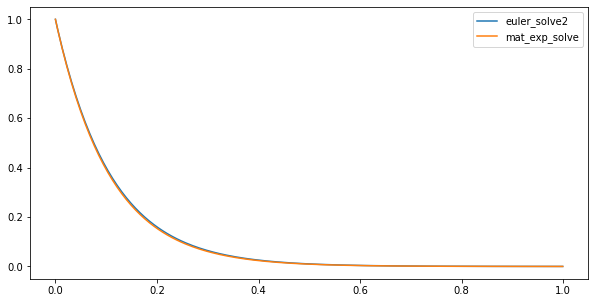


dim = 2


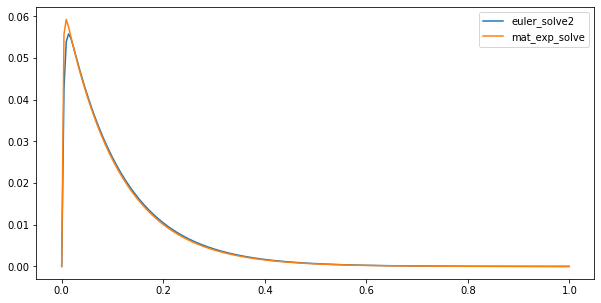

In [ ]:
for dt in [4e-3, 4.5e-3]:
  t, y = mod_implict_euler_scheme(a, u0, 1, dt)
  ym = mat_exp_solve(a, u0, t)

  print('dt =', dt)
  for dim in [0, 1]:
    print('\ndim =', dim+1)
    plt.figure(figsize=(10, 5))
    plt.plot(t, y[:, dim], label='euler_solve2')
    plt.plot(t, ym[:, dim], label='mat_exp_solve')
    
    plt.legend()
    plt.show()

# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера на интервале временине менее десяти периодов осцилляций. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{(du/dt)^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

(5 баллов)

dt =  0.01


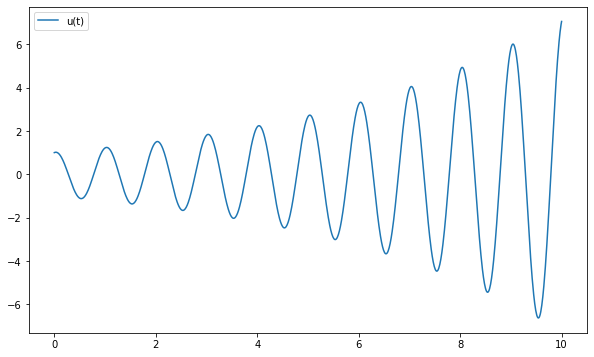

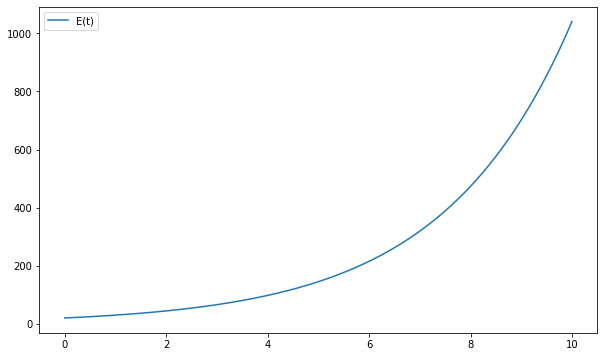


dt =  0.001


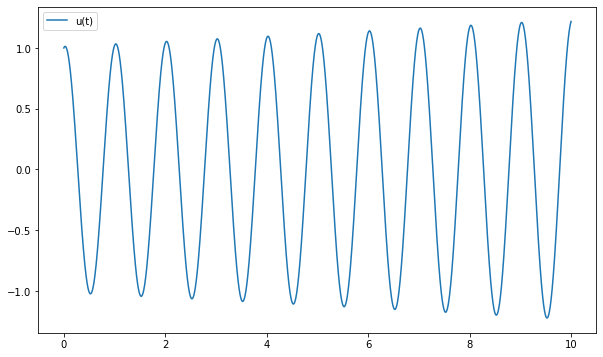

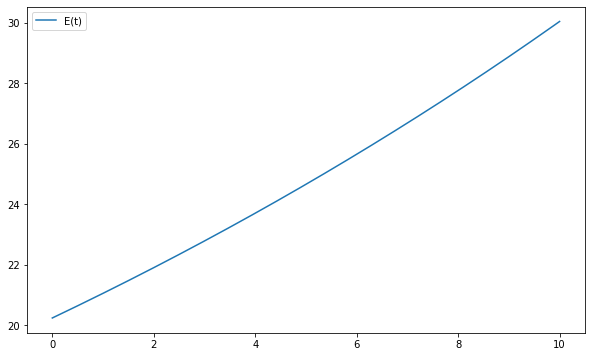


dt =  0.0001


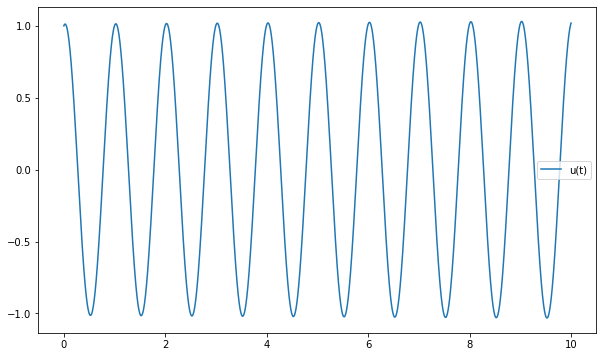

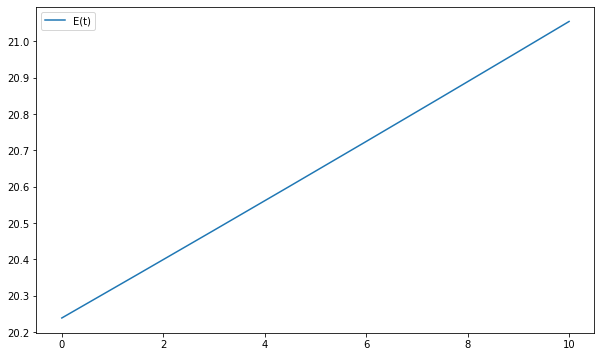

In [ ]:
T = 1
w = 2 * np.pi / T
a = np.array([[0, 1], [-w**2, 0]])

for dt in [1e-2, 1e-3, 1e-4]:
  t, y = euler_solve2(a, [1, 1], 10*T, dt)
  print('dt = ', dt)
  
  plt.figure(figsize=(10,6))
  plt.plot(t, y[:, 0], label='u(t)')
  plt.legend()
  plt.show()
  
  print()
  
  plt.figure(figsize=(10,6))
  plt.plot(t, y[:, 1]**2 / 2 + w**2 * y[:,0]**2 / 2, label='E(t)')
  plt.legend()
  plt.show()
  
  print()

### Тест III.2

Реализуйте схему Рунге-Кутта второго порядка. Используте ее для решения того же уравнения с теми же значениями шага $\tau$. Сравните решения, полученные методом Рунге-Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(5 баллов)

In [ ]:
def RK_method(a, u0, T, dt):
  a = np.asarray(a, dtype=float)
  u0 = np.asarray(u0, dtype=float)
  num_steps = int(T/dt)
  tt = np.arange(num_steps+1)*dt
  ndim = a.shape[0]
  y = np.empty((num_steps+1, ndim))
  y[0] = u0
  for k in range(num_steps):
      y_half = y[k] + dt/2 * a @ y[k]
      y[k+1] = y[k] + dt * a @ y_half
  return tt, y

dt =  0.01


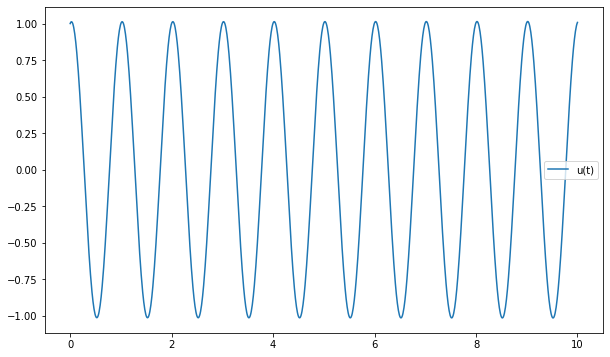

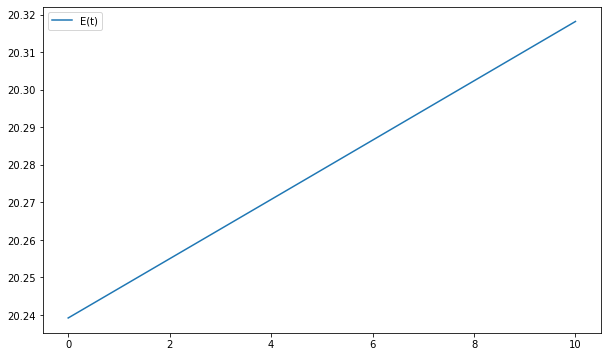


dt =  0.001


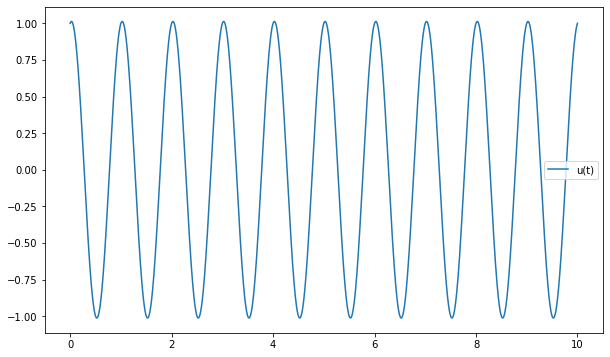

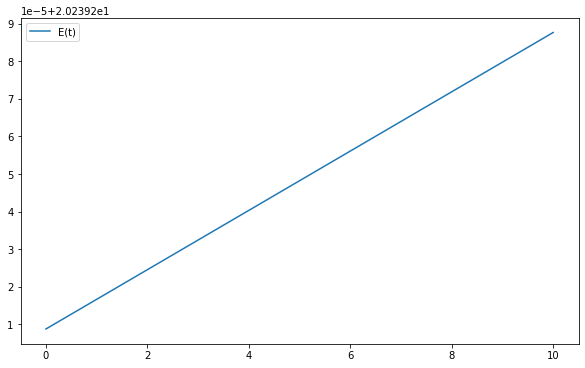


dt =  0.0001


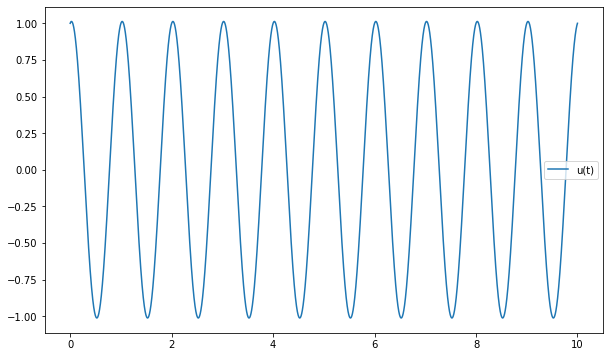

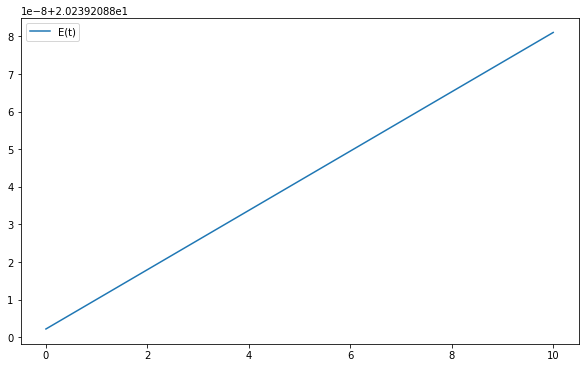

In [ ]:
for dt in [1e-2, 1e-3, 1e-4]:
  t, y = RK_method(a, [1, 1], 10*T, dt)
  print('dt = ', dt)
  
  plt.figure(figsize=(10,6))
  plt.plot(t, y[:, 0], label='u(t)')
  plt.legend()
  plt.show()
  
  print()
  
  plt.figure(figsize=(10,6))
  plt.plot(t, y[:, 1]**2 / 2 + w**2 * y[:,0]**2 / 2, label='E(t)')
  plt.legend()
  plt.show()
  
  print()

### Тест III.3

Используте для решения того же уравнения библиотечную функцию `scipy.intergrate_solve_ivp`.
Сравните результаты с решениями, полученными методомами Рунге-Кутта и Эйлера. Проверьте закон сохранения энергии. Обсудите.

(5 баллов)

dt =  0.01


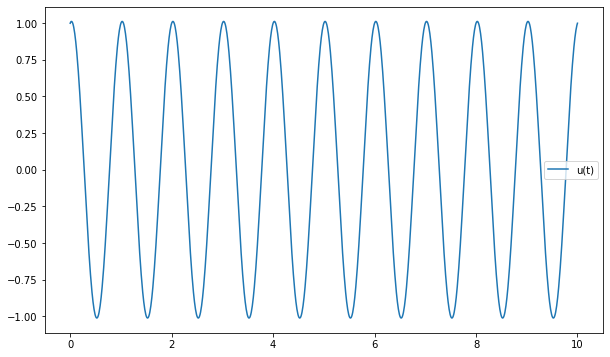

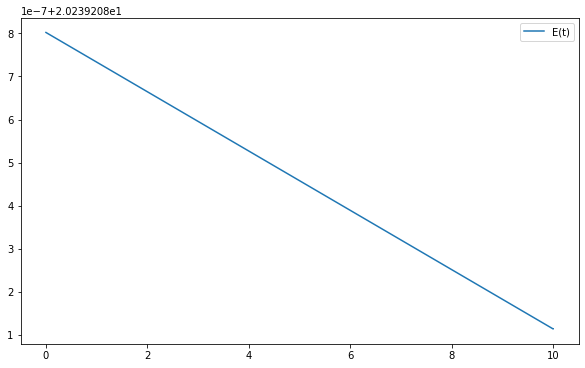


dt =  0.001


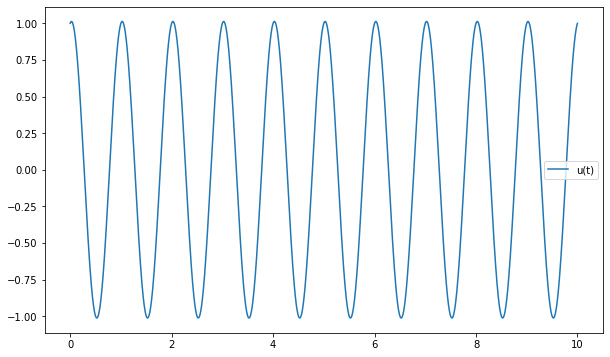

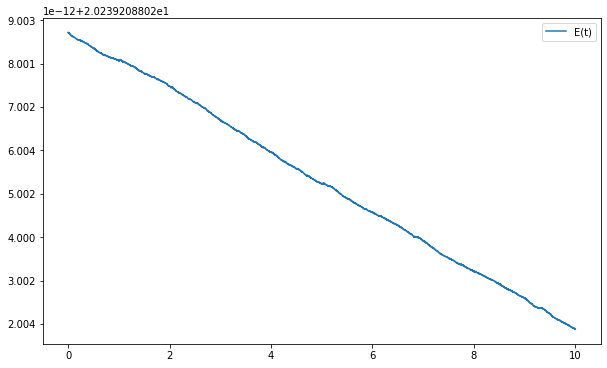


dt =  0.0001


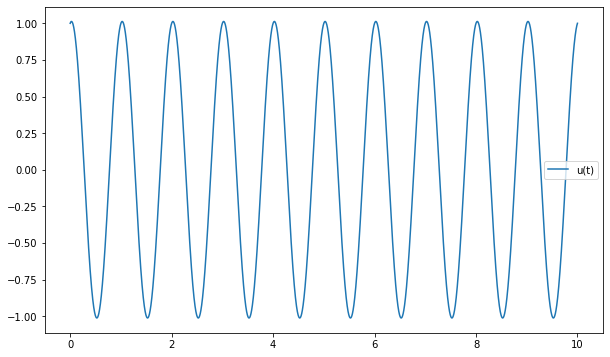

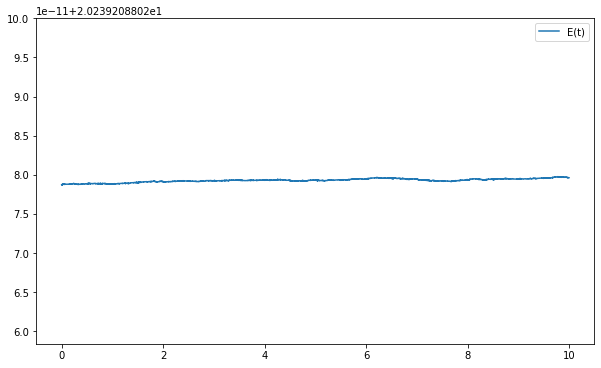

In [ ]:
from scipy.integrate import solve_ivp

for dt in [1e-2, 1e-3, 1e-4]:
  sol = solve_ivp(lambda _, x: a @ x, [0, 10*T], [1, 1], max_step=dt)
  print('dt = ', dt)
  
  plt.figure(figsize=(10,6))
  plt.plot(sol.t, sol.y[0, :], label='u(t)')
  plt.legend()
  plt.show()
  
  print()
  
  plt.figure(figsize=(10,6))
  plt.plot(sol.t, sol.y[1, :]**2 / 2 + w**2 * sol.y[0, :]**2 / 2, label='E(t)')
  plt.legend()
  plt.show()
  
  print()